### 1. Gather Sense of our data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/KUBIG/24_1_Advancedstudy_DA/Data/AnomalyDetection/'

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(data_path+'creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Column information
- V1 ~ V28: PCA 결과
- Time: 각 transaction과 데이터셋의 첫번째 transaction 사이에 경과한 시간
- Amount: transaction 금액
- Class: 사기 = 1, 정상 = 0
  - 매우 imbalanced

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- No null value!

In [8]:
print(f"No Frauds {round(df['Class'].value_counts()[0]/len(df)*100, 2)} % of the dataset")
print(f"Frauds {round(df['Class'].value_counts()[1]/len(df)*100, 2)} % of the dataset")

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


- Extremely imbalanced

Text(0.5, 1.0, 'Class Distributions')

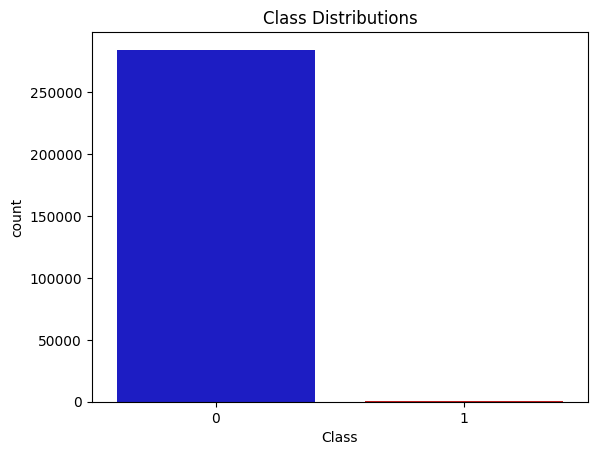

In [65]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions')

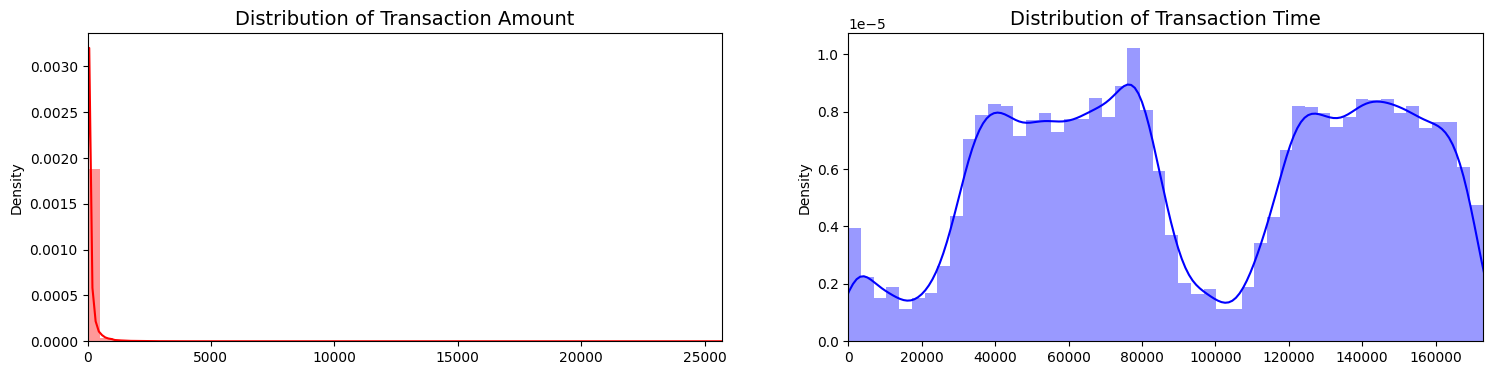

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

- V1~V28과 다르게 values의 range가 매우 넓음
- scaling 필요!

### 2. Data Preprocessing

#### Scaling and Distributing

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [16]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_amount']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


- dataframe.insert(loc for column, column name, values)
- Amount와 Time 모두 scaled 됨!

#### Splitting the data

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print(f"No Frauds {round(df['Class'].value_counts()[0]/len(df) * 100,2)} % of the dataset")
print(f"Frauds {round(df['Class'].value_counts()[1]/len(df) * 100,2)} % of the dataset")

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
  print(f"Train: {train_index}, Test: {test_index}")
  original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
  original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-'*100)

print('Label distributions')
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))    # 같은 비율로 나뉨

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806], Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806], Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806], Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806], Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868], Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label distributions
[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [19]:
df = df.sample(frac=1)     # frac=1: 모든 행을 무작위로 섞는다

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])   # Scaled data
new_df = normal_distributed_df.sample(frac=1, random_state=42)   # Sampling from Scaled data

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
44032,1.078320,1.078320,-0.255576,0.503596,1.355832,-0.798011,-0.054619,0.004496,1.190599,-0.576154,...,0.054361,-0.224175,-0.369389,-0.185608,-0.542720,-0.266818,0.814966,-0.587715,-0.471708,0
151807,0.161951,0.161951,-3.552173,5.426461,-3.731810,6.679062,-2.187543,2.433940,-8.748110,-12.108284,...,3.792667,-5.688990,2.510980,0.953933,-0.542506,-0.620152,0.406013,0.023025,0.164741,1
137694,0.108293,0.108293,0.985781,-0.223835,1.323857,1.665941,-0.721259,0.820892,-0.567152,0.379522,...,-0.129567,-0.332167,-0.531681,0.073028,0.235528,0.380432,-0.543158,0.087971,0.025075,0
30473,-0.105359,-0.105359,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,...,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,1
247995,0.410396,0.410396,1.146259,1.403458,-4.159148,2.660107,-0.323217,-1.836071,-1.623740,0.259562,...,0.284831,0.564450,0.445744,-0.141136,-0.265517,0.362260,-0.416062,0.507370,0.243744,1


### 3. Random UnderSampling and Oversampling

#### Distributing and Correlating

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


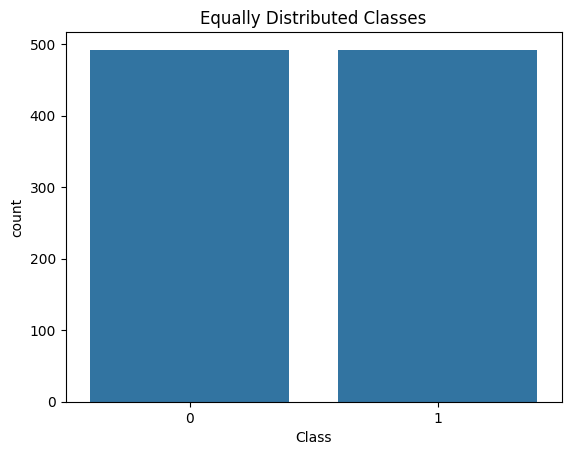

In [20]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df)
plt.title('Equally Distributed Classes')
plt.show()

- original dataset과 다르게 balanced dataset 생성됨

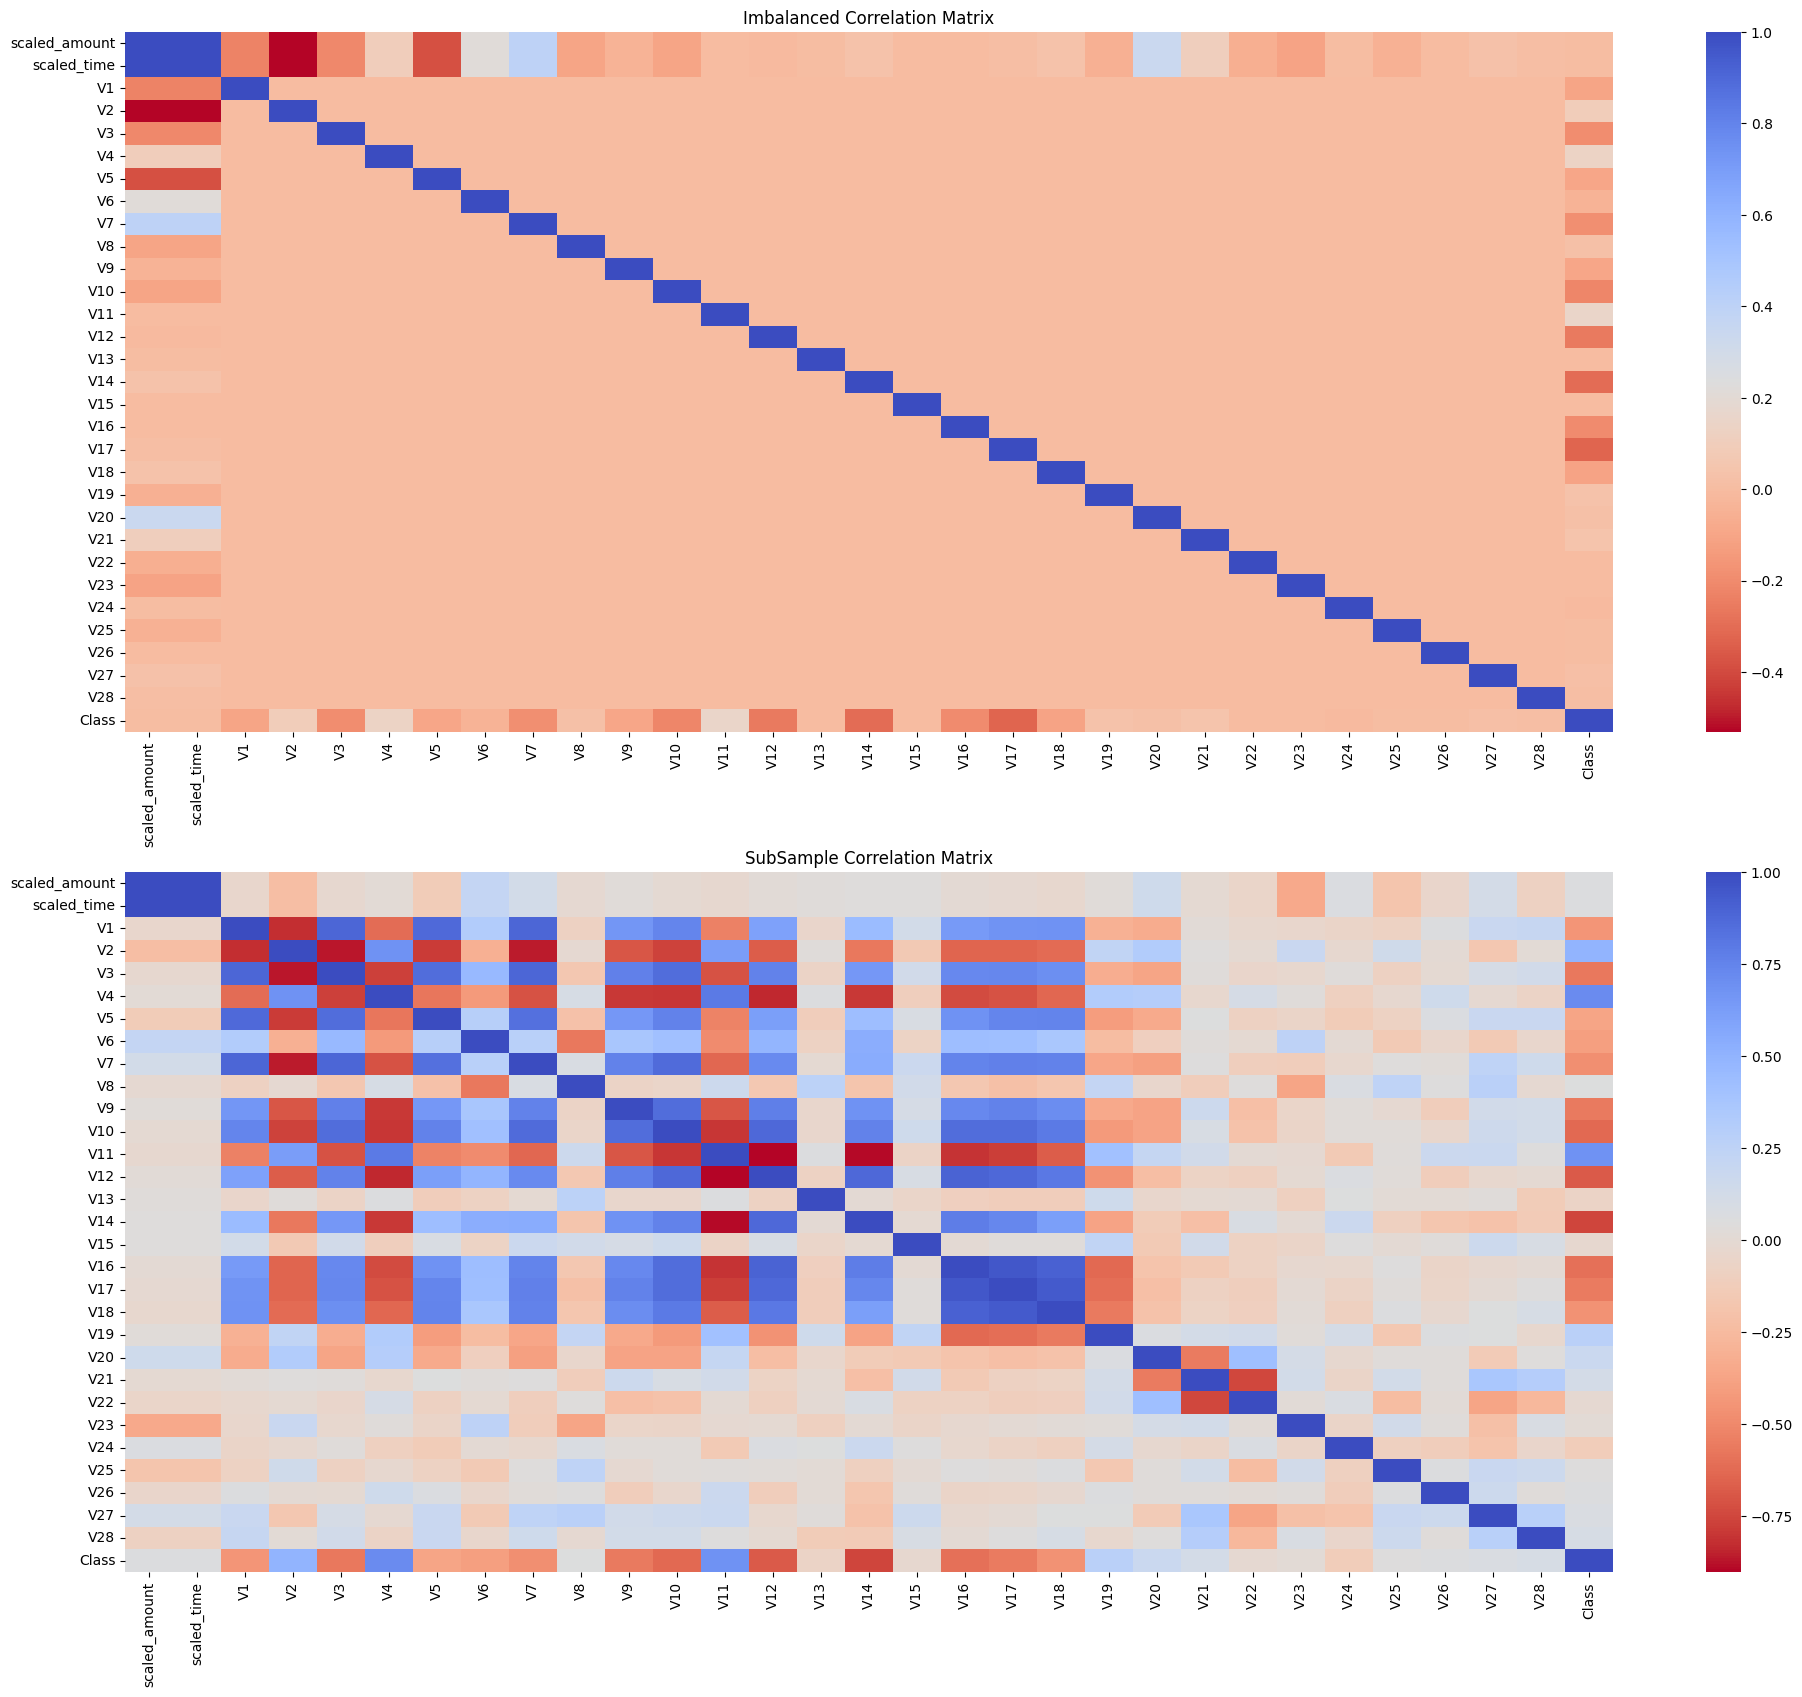

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title('Imbalanced Correlation Matrix')

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix')

plt.show()

- imbalanced: scaling이 안되어있었고 imbalanced 되어있어 correlation이 모두 낮게 나와버림
- balanced: scaling과 balanced 모두 충족되어 제대로 된 correlation value 나옴

- Class와 Negative correlation을 보이는 컬럼: V10, V12, V14, V17
- Class와 Positive correlation을 보이는 컬럼: V2, V4, V11, V19

Text(0.5, 1.0, 'V10 vs. Class Negative Correlation')

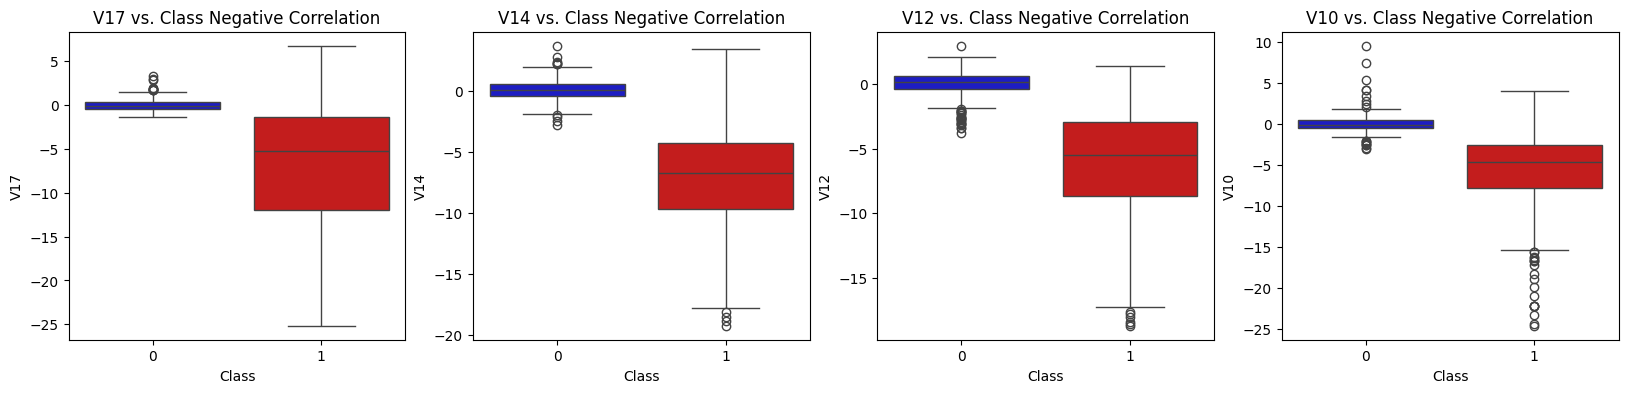

In [27]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x='Class', y='V17', data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs. Class Negative Correlation')

sns.boxplot(x='Class', y='V14', data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs. Class Negative Correlation')

sns.boxplot(x='Class', y='V12', data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs. Class Negative Correlation')

sns.boxplot(x='Class', y='V10', data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs. Class Negative Correlation')

Text(0.5, 1.0, 'V19 vs. Class Positive Correlation')

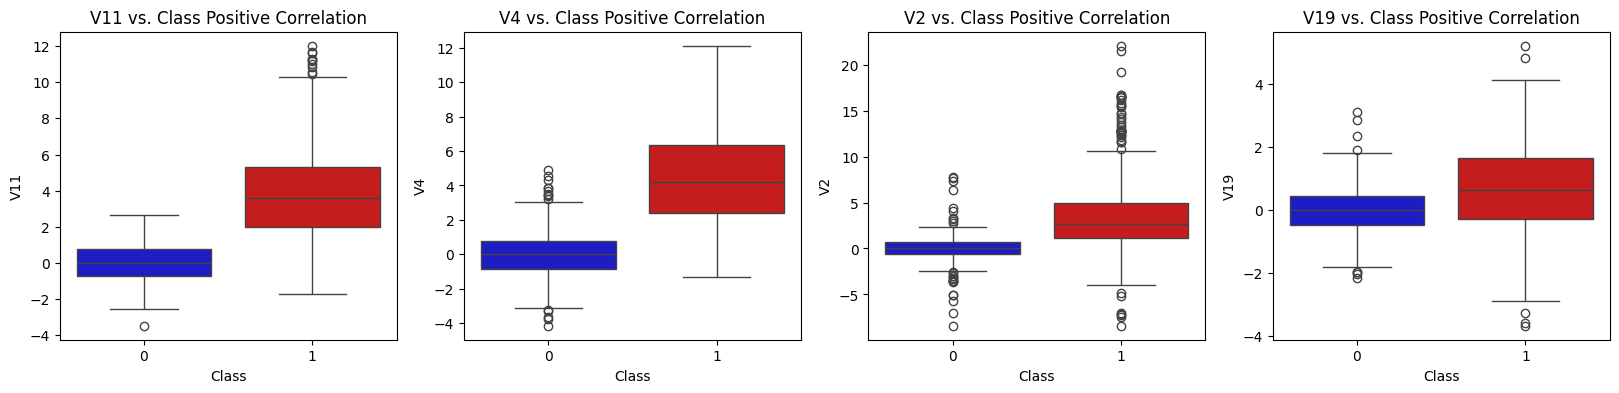

In [66]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x='Class', y='V11', data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs. Class Positive Correlation')

sns.boxplot(x='Class', y='V4', data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs. Class Positive Correlation')

sns.boxplot(x='Class', y='V2', data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs. Class Positive Correlation')

sns.boxplot(x='Class', y='V19', data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs. Class Positive Correlation')

- Positive correlation을 가진 컬럼들과 Negative correlation을 가진 컬럼들은 확연히 다른 boxplot 분포를 보임!

#### Anomaly Detection

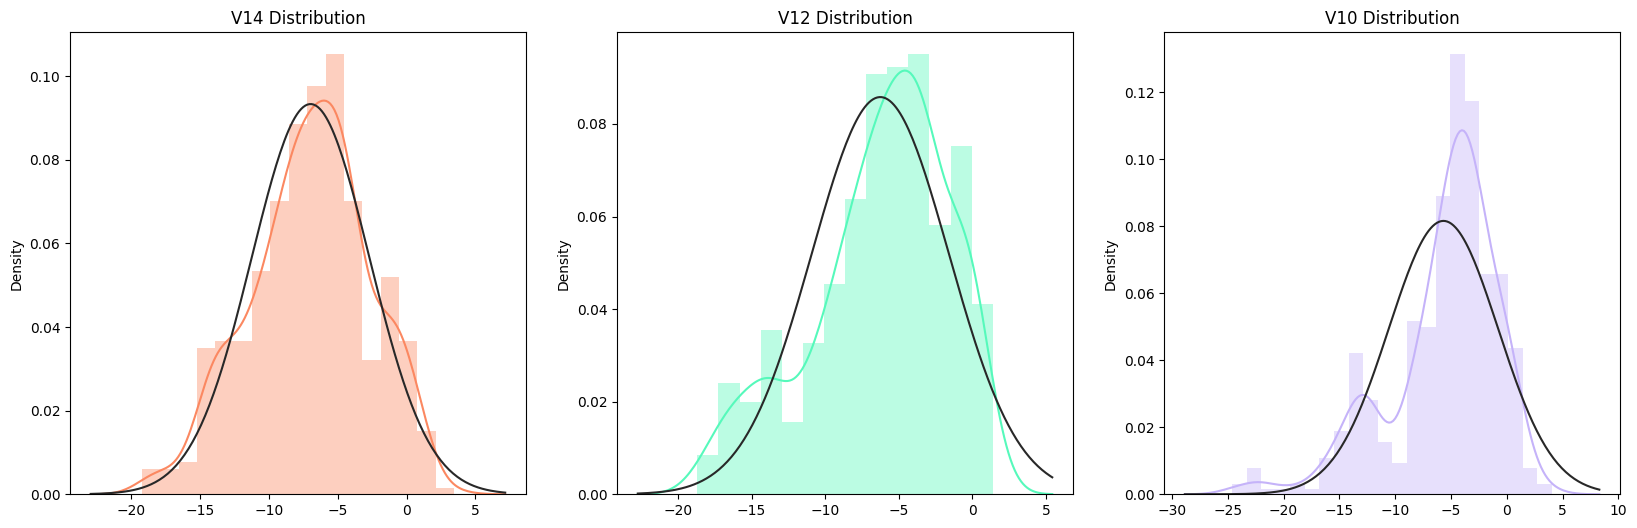

In [30]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='#FB8861')
ax1.set_title("V14 Distribution")

v12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title("V12 Distribution")

v10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title("V10 Distribution")

plt.show()

In [31]:
# V14 outliers
v14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print(f'Quartile 25: {q25}, Quartile 75: {q75}')
v14_iqr = q75 - q25
print(f"iqr: {v14_iqr}")

v14_cut_off = v14_iqr *1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print(f'Cut Off: {v14_cut_off}')
print(f'V14 Lower: {v14_lower}')
print(f'V14 Upper: {v14_upper}')

outliers = [x for x in v14_fraud if x<v14_lower or x>v14_upper]    # lower보다 작거나 upper보다 큰 x를 outliers에 저장
print(f'Feature V14 Outliers for Fraud Cases: {len(outliers)}')
print(f"V14 outliers: {outliers}")

new_df = new_df.drop(new_df[(new_df['V14']>v14_upper) | new_df['V14']<v14_lower].index)   # Drop outliers
print('----' * 44)

# V12 outliers
v12_fraud = new_df['V12'].loc[new_df['Class']==1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print(f'Quartile 25: {q25}, Quartile 75: {q75}')
v12_iqr = q75 - q25
print(f"iqr: {v12_iqr}")

v12_cut_off = v12_iqr *1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print(f'Cut Off: {v12_cut_off}')
print(f'V12 Lower: {v12_lower}')
print(f'V12 Upper: {v12_upper}')

outliers = [x for x in v12_fraud if x<v12_lower or x>v12_upper]    # lower보다 작거나 upper보다 큰 x를 outliers에 저장
print(f'Feature V12 Outliers for Fraud Cases: {len(outliers)}')
print(f"V12 outliers: {outliers}")

new_df = new_df.drop(new_df[(new_df['V12']>v12_upper) | new_df['V12']<v12_lower].index)   # Drop outliers
print('----' * 44)

# V10 outliers
v10_fraud = new_df['V10'].loc[new_df['Class']==1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print(f'Quartile 25: {q25}, Quartile 75: {q75}')
v10_iqr = q75 - q25
print(f"iqr: {v10_iqr}")

v10_cut_off = v10_iqr *1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print(f'Cut Off: {v10_cut_off}')
print(f'V10 Lower: {v10_lower}')
print(f'V10 Upper: {v10_upper}')

outliers = [x for x in v10_fraud if x<v10_lower or x>v10_upper]    # lower보다 작거나 upper보다 큰 x를 outliers에 저장
print(f'Feature V10 Outliers for Fraud Cases: {len(outliers)}')
print(f"V10 outliers: {outliers}")

new_df = new_df.drop(new_df[(new_df['V10']>v10_upper) | new_df['V10']<v10_lower].index)   # Drop outliers
print('----' * 44)


Quartile 25: -9.692722964972386, Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 outliers: [-18.8220867423816, -19.2143254902614, -18.4937733551053, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -8.688176521812306, Quartile 75: -2.97408802538493
iqr: 5.714088496427376
Cut Off: 8.571132744641064
V12 Lower: -17.25930926645337
V12 Upper: 5.597044719256134
Feature V12 Outliers for Fraud Cases: 6
V12 outliers: [-17.6316063138707, -18.0475965708216, -17.7691434633638, -18.6837146333443, -18.5536970096458, -18.4311310279993]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

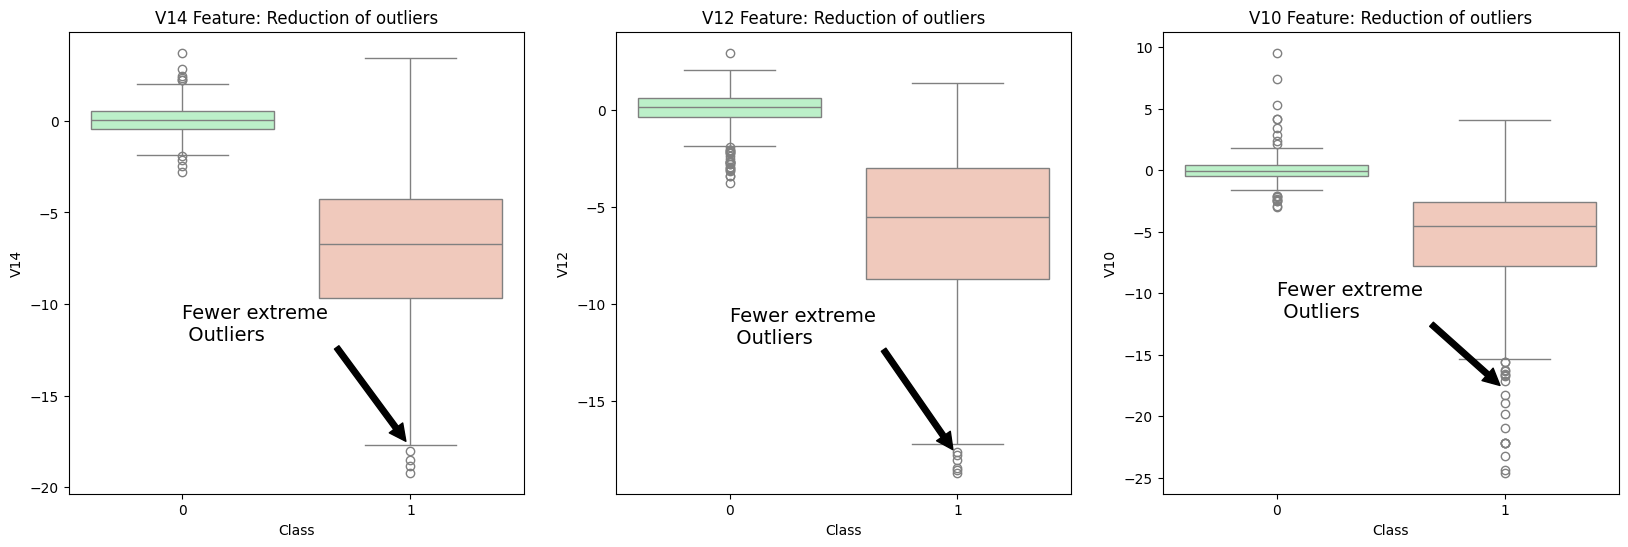

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']

sns.boxplot(x='Class', y='V14', data=new_df, ax=ax1, palette=colors)
ax1.set_title('V14 Feature: Reduction of outliers')
ax1.annotate('Fewer extreme \n Outliers', xy=(0.98, -17.5), xytext=(0, -12),
             arrowprops=dict(facecolor='black'),
             fontsize=14)

sns.boxplot(x='Class', y='V12', data=new_df, ax=ax2, palette=colors)
ax2.set_title('V12 Feature: Reduction of outliers')
ax2.annotate('Fewer extreme \n Outliers', xy=(0.98, -17.5), xytext=(0, -12),
             arrowprops=dict(facecolor='black'),
             fontsize=14)

sns.boxplot(x='Class', y='V10', data=new_df, ax=ax3, palette=colors)
ax3.set_title('V10 Feature: Reduction of outliers')
ax3.annotate('Fewer extreme \n Outliers', xy=(0.98, -17.5), xytext=(0, -12),
             arrowprops=dict(facecolor='black'),
             fontsize=14)

plt.show()

- outlier가 적어졌다!

#### Dimensionality Reduction and Clustering

In [34]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1-t0))

t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1-t0))

t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm = 'randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:2} s".format(t1-t0))

T-SNE took 2.6e+01 s
PCA took 0.053 s
Truncated SVD took 0.06489944458007812 s


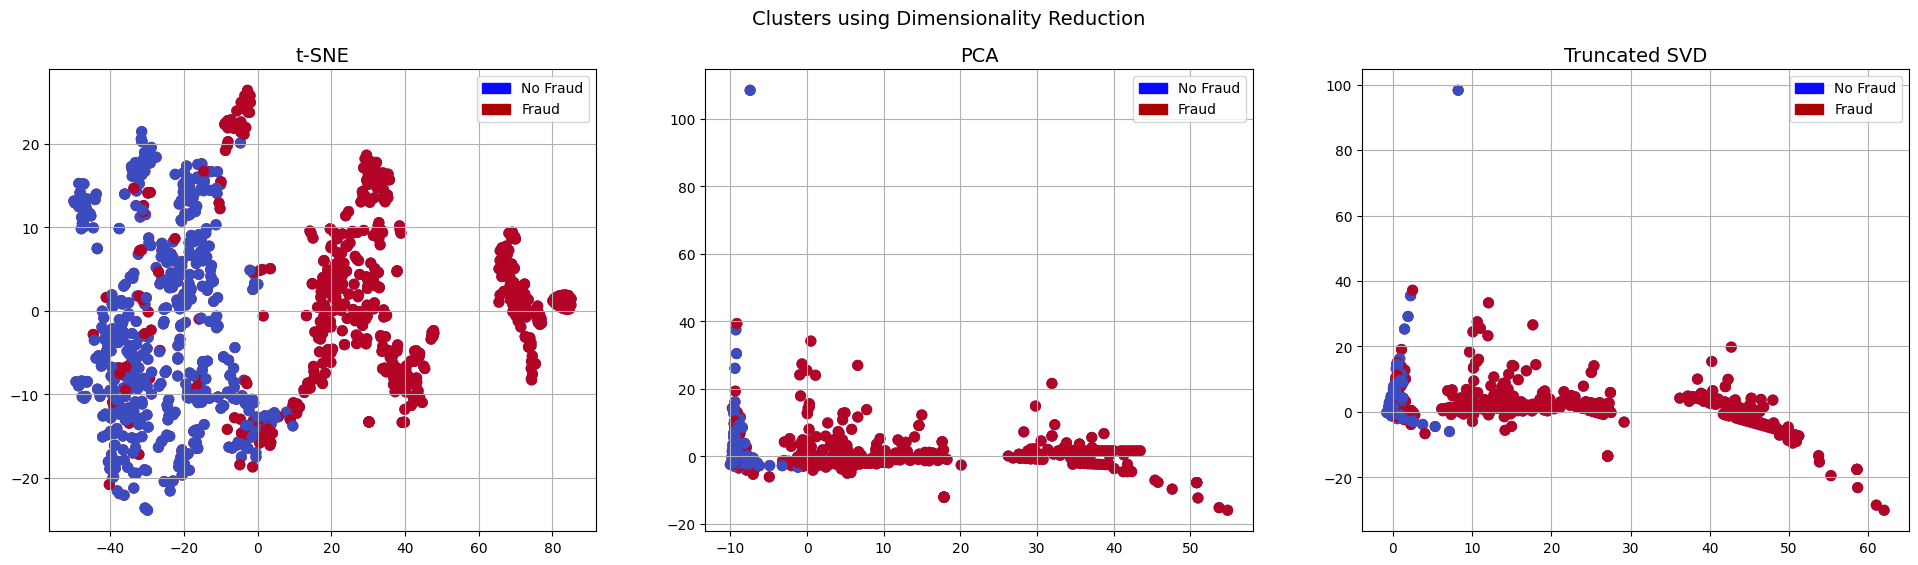

In [35]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# T-SNE
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:,1], c=(y==0),
            cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:,1], c=(y==1),
            cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:,1], c=(y==0),
            cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:,1], c=(y==1),
            cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:,1], c=(y==0),
            cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:,1], c=(y==1),
            cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

#### Classifiers (Undersampling)

In [36]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [44]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [45]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
  classifier.fit(X_train, y_train)
  training_score = cross_val_score(classifier, X_train, y_train, cv=5)
  print("Classifiers: ", classifier.__class__.__name__, "Has a training score of",
        round(training_score.mean(), 2)*100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 92.0 % accuracy score


In [46]:
# Let's do Grid Search!
from sklearn.model_selection import GridSearchCV

log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)),
                 "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

svc_params = {'C': [0.5, 0.7, 0.9, 1],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

tree_params = {'criterion': ['gini', 'entropy'],
               'max_depth': list(range(2,4,1)),
               'min_samples_leaf': list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [47]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean()*100, 2).astype(str)+'%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score: ', round(knears_score.mean()*100, 2).astype(str)+'%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score: ', round(svc_score.mean()*100, 2).astype(str)+'%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score: ', round(tree_score.mean()*100, 2).astype(str)+'%')

Logistic Regression Cross Validation Score:  95.55%
Knears Neighbors Cross Validation Score:  95.17%
Support Vector Classifier Cross Validation Score:  95.43%
DecisionTree Classifier Cross Validation Score:  93.9%


In [49]:
# Let's do undersampling!
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
  print("Train: ", train_index, "Test: ", test_index)
  undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
  undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

Train:  [ 56960  56961  56962 ... 284804 284805 284806] Test:  [    0     1     2 ... 56959 57435 57800]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 56960  56961  56962 ... 114937 115047 115147]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [113920 113921 113922 ... 173785 174964 175111]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [170881 170882 170883 ... 230385 230618 231170]
Train:  [     0      1      2 ... 230385 230618 231170] Test:  [227838 227839 227840 ... 284804 284805 284806]


In [51]:
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Lable Distribution: {}'.format(Counter(y_nearmiss)))

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
  undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
  undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
  undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

  undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
  undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
  undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
  undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
  undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

NearMiss Lable Distribution: Counter({0: 492, 1: 492})


In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4,
                        X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
      plt.ylim(*ylim)

    # first estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='#ff9124')
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='#2492ff')
    ax1.plot(train_sizes, train_scores_mean, 'o-', color='#ff9124', label='Training score')
    ax1.plot(train_sizes, test_scores_mean, 'o-', color='#2492ff', label='Cross-validation score')
    ax1.set_title('Logistic Regression \n Learning Curve', fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc='best')

    # second estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='#ff9124')
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='#2492ff')
    ax2.plot(train_sizes, train_scores_mean, 'o-', color='#ff9124', label='Training score')
    ax2.plot(train_sizes, test_scores_mean, 'o-', color='#2492ff', label='Cross-validation score')
    ax2.set_title('Knears Neighbors \n Learning Curve', fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc='best')

    # third estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='#ff9124')
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='#2492ff')
    ax3.plot(train_sizes, train_scores_mean, 'o-', color='#ff9124', label='Training score')
    ax3.plot(train_sizes, test_scores_mean, 'o-', color='#2492ff', label='Cross-validation score')
    ax3.set_title('Support Vector Classifier \n Learning Curve', fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc='best')

    # fourth estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='#ff9124')
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='#2492ff')
    ax4.plot(train_sizes, train_scores_mean, 'o-', color='#ff9124', label='Training score')
    ax4.plot(train_sizes, test_scores_mean, 'o-', color='#2492ff', label='Cross-validation score')
    ax4.set_title('Decision Tree Classifier \n Learning Curve', fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc='best')
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

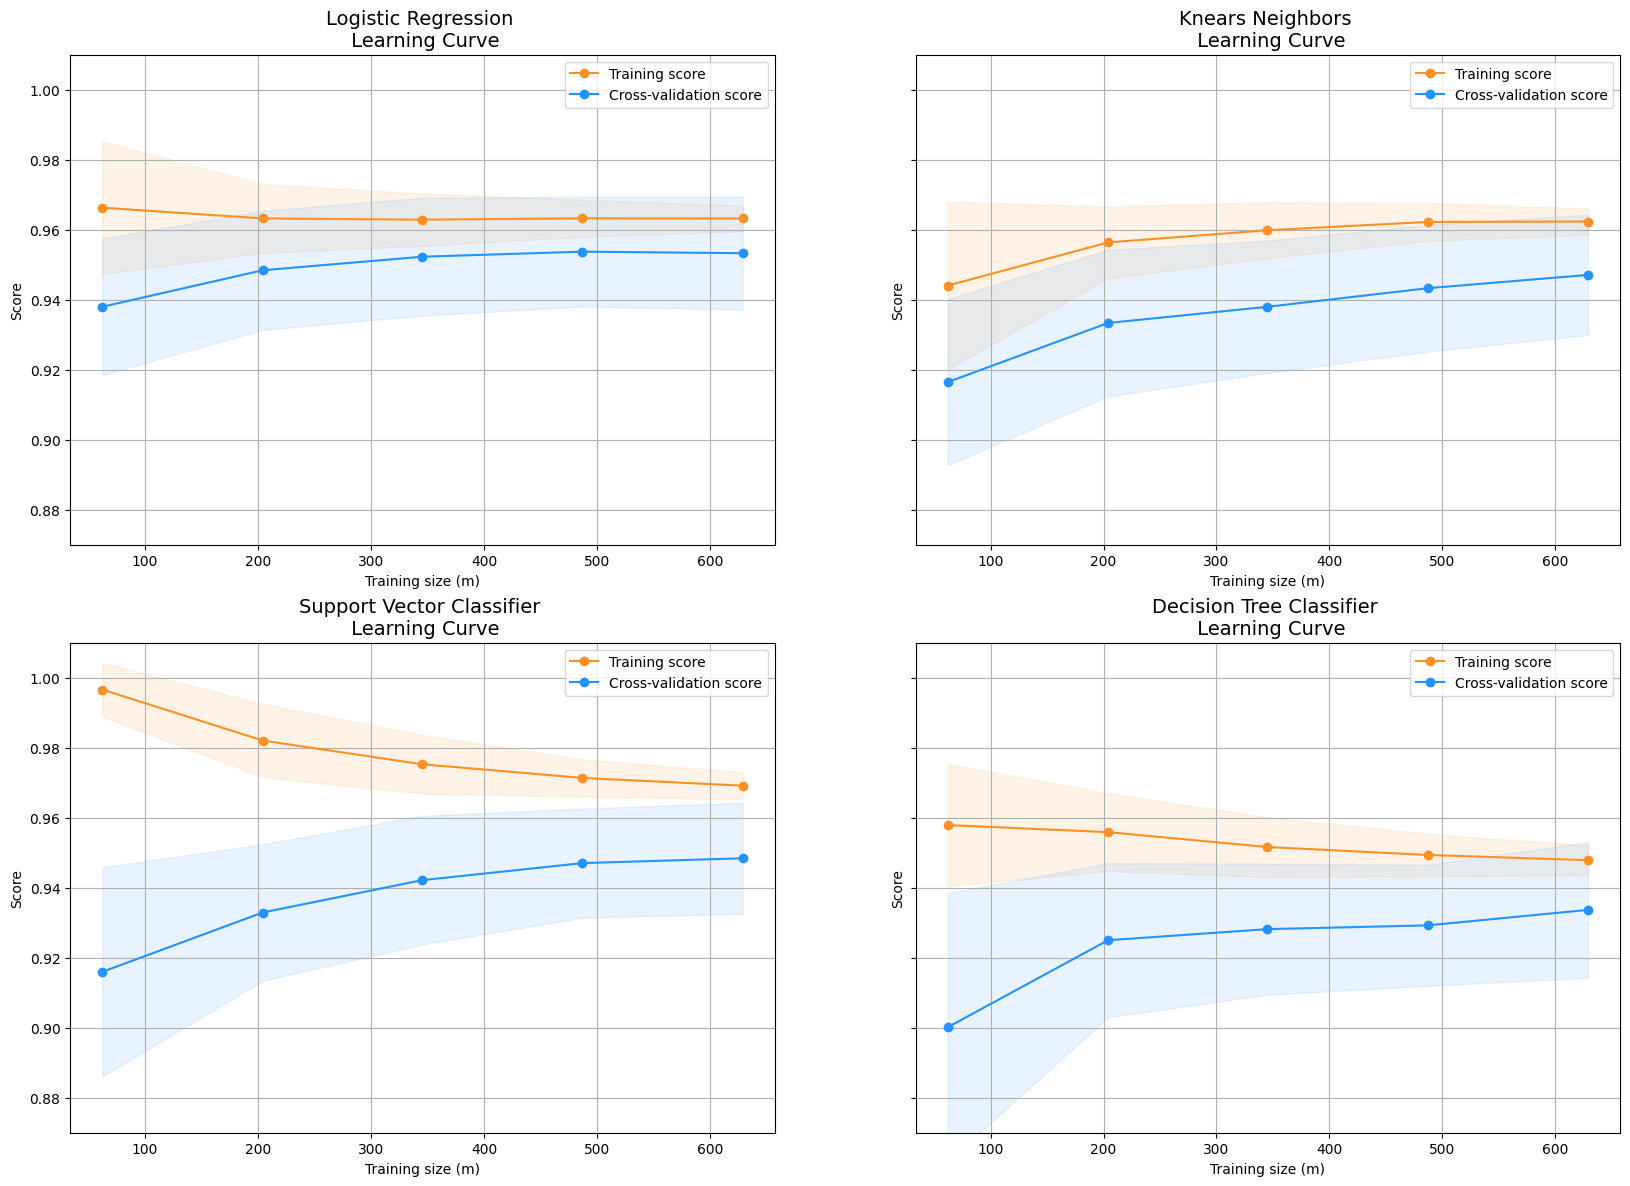

In [54]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [55]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method='decision_function')
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method='decision_function')
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [56]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9858315558141039
KNears Neighbors:  0.950261780104712
Support Vector Classifier:  0.9849783465839314
Decision Tree Classifier:  0.9385850946932971


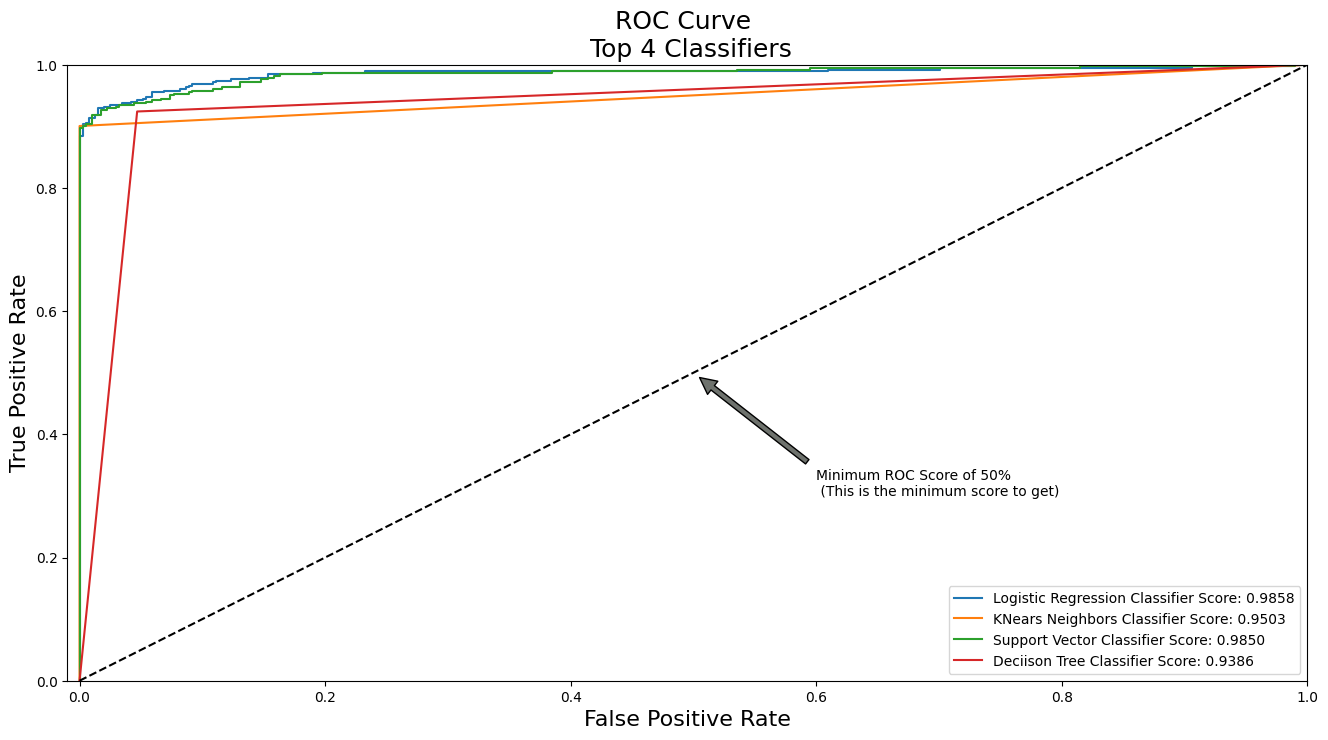

In [57]:
log_fpr, log_tpr, log_threshold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
  plt.figure(figsize=(16,8))
  plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
  plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
  plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
  plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
  plt.plot(tree_fpr, tree_tpr, label='Deciison Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))

  plt.plot([0,1], [0,1], 'k--')
  plt.axis([-0.01, 1, 0, 1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)',
               xy=(0.5, 0.5), xytext=(0.6, 0.3), arrowprops=dict(facecolor='#6E726D', shrink=0.05))
  plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

#### A Deeper Look into LogisticRegression

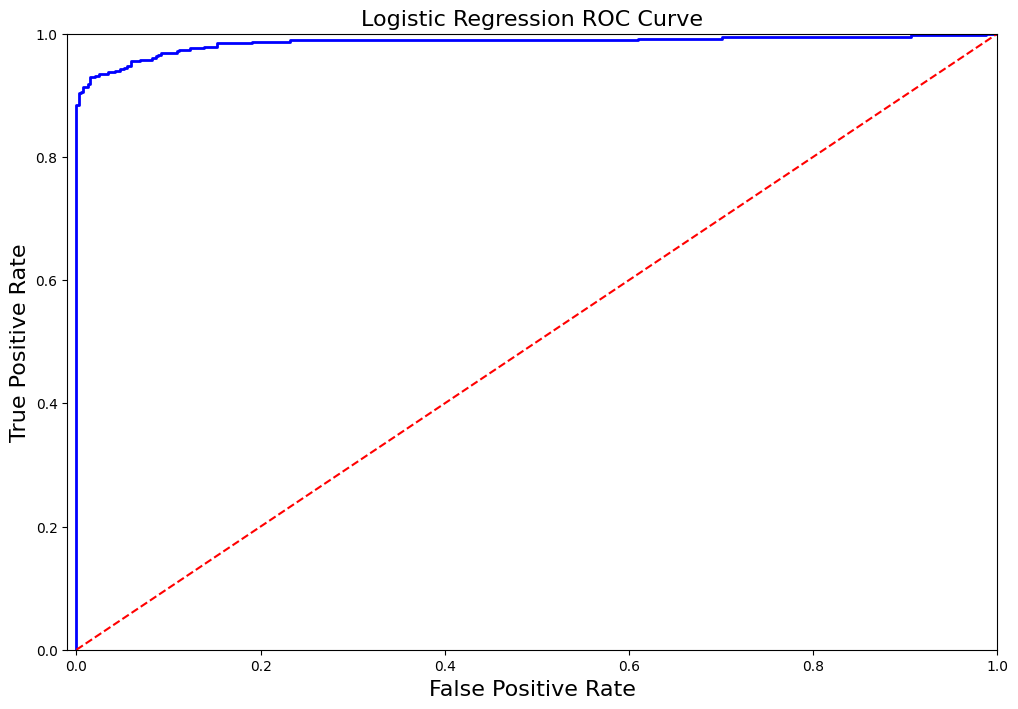

In [59]:
def logistic_roc_curve(log_fpr, log_tpr):
  plt.figure(figsize=(12, 8))
  plt.title('Logistic Regression ROC Curve', fontsize=16)
  plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
  plt.plot([0,1], [0,1], 'r--')
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.axis([-0.01, 1, 0, 1])

logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [60]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [61]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.93
Precision Score: 0.78
F1 Score: 0.85
Accuracy Score: 0.84
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.76
Precision Score: 0.00
Recall Score: 0.24
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [62]:
undersample_y_score = log_reg.decision_function(original_Xtest)

from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)
print('Average precision-recall score: {0:0.2f}'.format(undersample_average_precision))

Average precision-recall score: 0.04


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score=0.04')

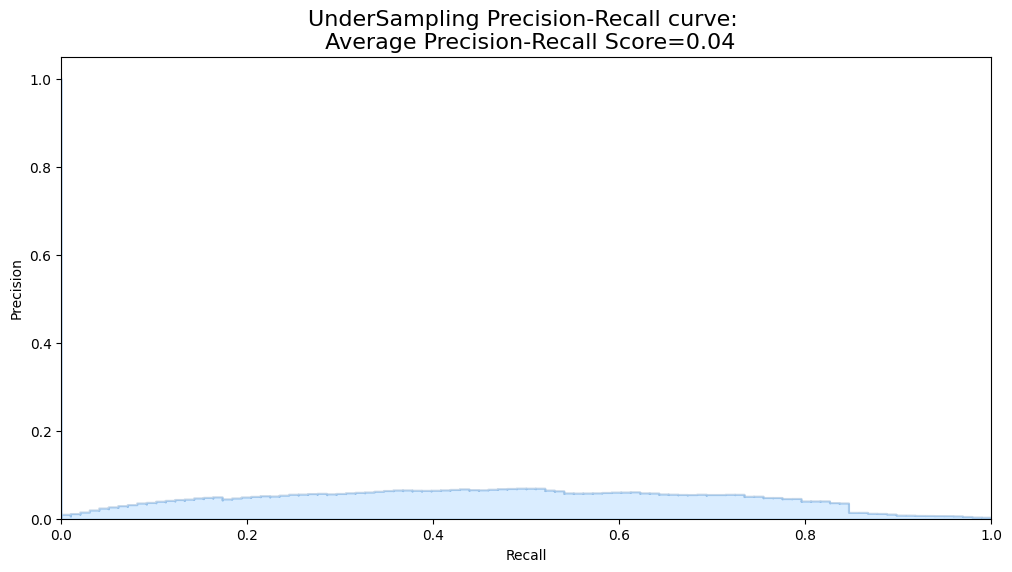

In [63]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score={0:0.2f}'.format(undersample_average_precision), fontsize=16)

#### SMOTE(Oversampling)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

log_reg_params = {'penalty': ['l1', 'l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
  pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy = 'minority'), rand_log_reg)
  model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
  best_est = rand_log_reg.best_estimator_
  prediction = best_est.predict(original_Xtrain[test])